In [183]:
%matplotlib inline
from IPython.display import clear_output
import sqlite3
import ipywidgets as widgets
import re
import json
import urllib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from datetime import datetime

In [184]:
con = sqlite3.connect("/home/alexandru/ManySecured/build/pcap.sqlite")
cur = con.cursor()

Dropdown(description='MAC:', options=('00:04:00:01:00:06', '04:f0:21:5a:f4:c4', '00:00:00:01:00:06', '44:2a:60…

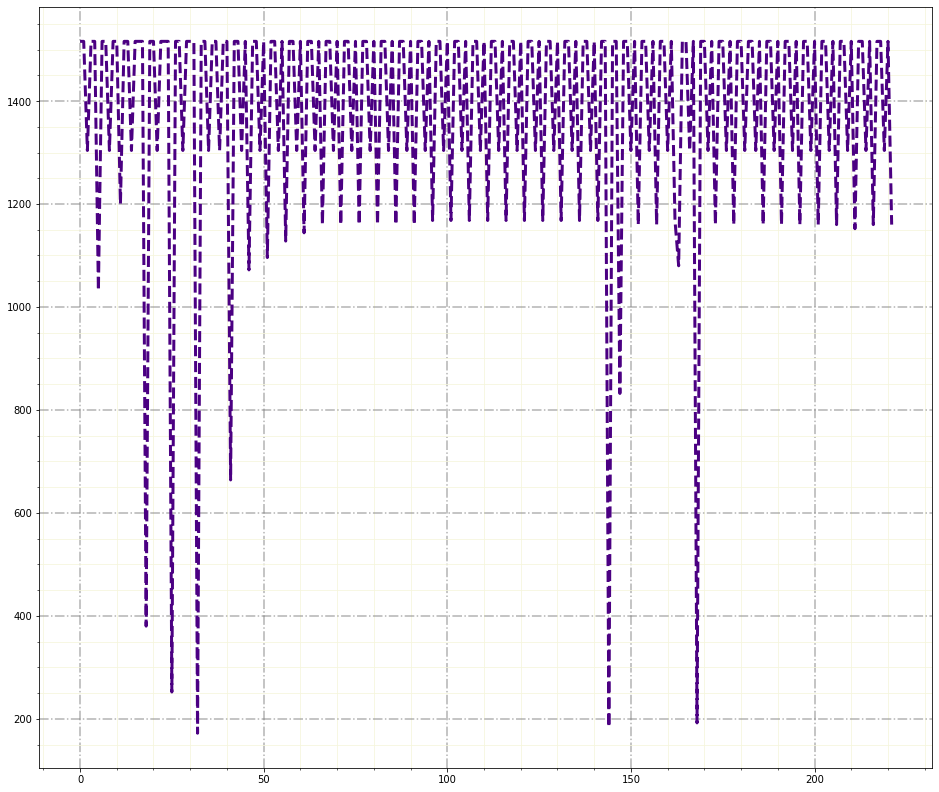

In [208]:
def get_packet_mac_arr(mac_address):
    packet_timestamp = []
    packet_length = []
    idx = 0;
    for row in cur.execute('SELECT timestamp,length FROM eth WHERE ether_dhost="' + mac_address + '" ORDER BY timestamp ASC'):
        packet_timestamp.append(idx)
        packet_length.append(row[1])
        idx = idx + 1
    return (packet_timestamp, packet_length)

# retrieve the distinct mac addresses
mac_dict = {}
for row in cur.execute('SELECT * FROM eth ORDER BY timestamp ASC'):
    mac_dict[row[5]] = 1;
    mac_dict[row[6]] = 1;

mac_list = list(mac_dict.keys())
wmac = widgets.Dropdown(
    options=mac_list,
    value=mac_list[0],
    description='MAC:',
    disabled=False,
)

def on_mac_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        mac_address = change['new'] 
        (x,y) = get_packet_mac_arr(mac_address)        
wmac.observe(on_mac_change)

display(wmac)
fig, ax = plt.subplots(figsize=(16, 14))
(x, y) = get_packet_mac_arr("00:04:00:01:00:06")
ax.plot(x, y, color='Indigo', linestyle='--', linewidth=3)
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)
ax.minorticks_on()
ax.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)
fig.show()

In [186]:
# retrieve the distinc IP4 addresses
ip4_dict = {}
for row in cur.execute('SELECT * FROM ip4 ORDER BY timestamp ASC'):
    ip4_dict[row[14]] = 1;
    ip4_dict[row[15]] = 1;

ip4_list = list(ip4_dict.keys())
wip4 = widgets.Dropdown(
    options=ip4_list,
    value=ip4_list[0],
    description='IP:',
    disabled=False,
)

def on_ip_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print(change['new'])
        
wip4.observe(on_ip_change)
display(wip4)

Dropdown(description='IP:', options=('10.0.0.191', '224.0.0.251', '224.0.0.22', '80.233.123.1', '10.0.0.1', '7…